# Database Search in Sequence Analysis

## Table of content

1. [Database Search in Sequence Anaysis](#Database-Search-in-Sequence-Analysis)
   1. [Table of content](#Table-of-content)
2. [Rational](#Rational)
3. [Large-Scale Lemma](#Large-Scale-Lemma)
4. [FastA](#FastA)
   1. [FastA Webservices](#FastA-Webservices)
5. [BLAST](#BLAST)
   1. [BLAST Webservices](#BLAST-Webservices)
   2. [BLAST variants](#BLAST-variants)
      1. [BLASTn](#BLASTn)
      2. [BLASTx](#BLASTx)
      3. [tBLASTn](#tBLASTn)
      4. [tBLASTx](#tBLASTx)
   3. [Low complexity regions](#Low-complexity-regions)
   4. [Dissimilar-sequences](#Dissimilar-sequences)
      1. [PSI BLAST](#PSI-BLAST)
      2. [PHI BLAST](#PHI-BLAST)
      3. [Delta BLAST](#Delta-BLAST)
7. [Exercises](#Exercises)
   1. [Exercise 1 - FastA](#Exercise-1---FastA)
   2. [Exercise 2 - WNT-proteins](#Exercise-2---WNT-proteins)
   3. [Exercise 3 - Structure Search](#Exercise-3---Structure-Search)
   4. [Exercise 4 - Protein BLAST](#Exercise-4---Protein-BLAST)
   5. [](#)
   6. [Exercise 6 - Jurassic Park](#Exercise-6---Jurassic-Park)
   7. [](#)
   8. [](#)

# Rational

To gather as much information about an unknown sequence as possible we compare it to already known and analyzed sequences in databases (e.g. UniProt/SwissProt for proteins)

- need specialized algorithms to look for similar / homologous sequences
- those are much more diverse, we want sequences that are even just similar not completely identical
- extremely large scale!!

# Large-Scale Lemma

The Large-Scale Lemma refers to the problem that in a very large database each arbitrary sequence can be found with great probability, even though it has nothing to do with our sequence.

The E-value represents the anticipated number of alignments with the same score as our result in a random database

- depends on length of query size
- depends on size of database
- example: E-value of 0.05 means that there is a 5 in 100 chance of the alignment occurring by chance alone
- supposed to be as near as 0 as possible
  - E-value < 10e-100: identical sequence
  - 10e-100 < E-value < 10e-50: Almost identical sequences
  - 10e-50 < E-value < 10e-10: Closely related sequences
  - 10e-10 < E-value < 1: potential homologue sequences (gray area)
  - E-value > 1 Proteins are most likely not related
  - E-value > 10 Hits are most likely junk unless the query sequence is very short

# FastA

- searches for a match to a given nucleotide or aa sequence in a database
- not calculating optimal alignment!
- largely heuristic and therefore fast

Algorithm:

- splitting up the sequence in a k-mer (aa k=2, nucleotides k=4-6)
- search for regions in the database that are identical with the k-mers
- find the best regions containing the fragments and score them according to s substitution matrix
- combine the fragments by adding gaps between them for an approximate alignment
- if the approximate alignment is better than a given threshold an optimal pairwise alignment is calculated and hadned over

**Step 1:**

- the sequence is split up into length
  - 1-2 for proteins
  - 4-6 for nucleotides
- these k-mers overlap
- the database sequences are matched with the kmers in an alignment matrix
- each hit even of a single kmer is a diagonal in this matrix, several kmers following each other lead to longer ,i.e. better, diagonals
- only matrices with at least x (I think 10) diagonals (even just a single kmer hit) are considered
- if a matrix is considered the 10 longest diagonals are taken to the next step

**Step 2:**

- the ten regions that were saved in step 1 are analyzed again
- they are rescored using BLOSUM 50 or another matrix depending on the parameters you define
   - the different match scores of these diagonals are added together
- The diagonal that produces the best score is called Init 1 and the values of these Init 1 regions are used to rank all found sequences up to this point

**Step 3:**

- the high scoring regions are combined to form an approximate aligbment
- along the main diagonal, including the Init 1 region
- the approximate alignment is done by introducing gaps with harsh gap penalties
  - open gap penalty -10, gap-extesion penalty -2
- only approximate alignments that score better than a certain threshold are taken into account as hits
- we cannot *directly* influence this threshold

**Step 4:**

- the sequences available after Steps1-3 are now used to calculate an optimal alignment
- uses an adjusted version of thr Smith-Waterman algorithm
- takes the already identified diagonals and creates the alignment around them
- results returned depend on the settings, per default 50 sequences

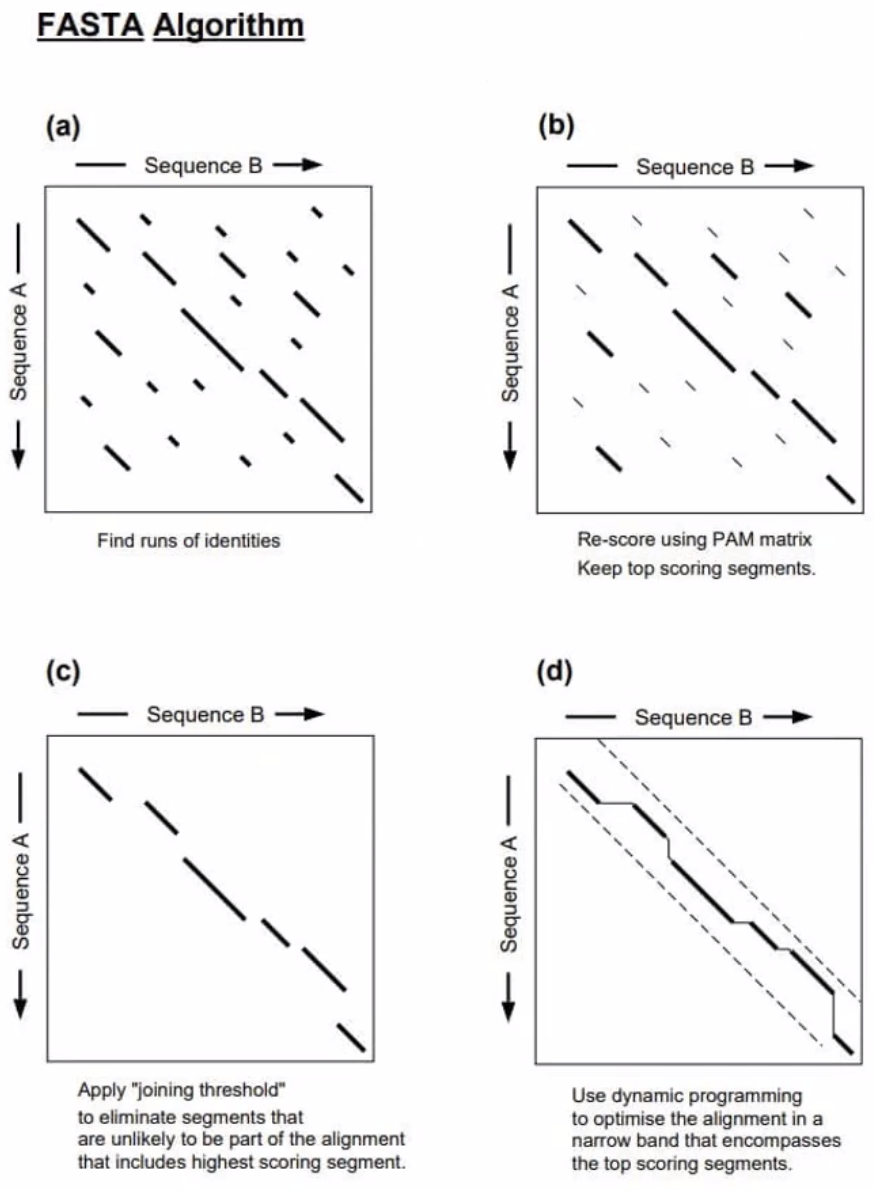

## FastA Webservices

https://www.ebi.ac.uk/jdispatcher/sss/fasta

The web page allows us to adjust the search by:

- Using different databases
  - at the top of the page
  - default UniProtKB/SwissProt
  - start with SwissProt, if not enough hits continue with UniProt Knowledgebase
- Adjusting the search parameter
  - MATRIX: default is blossum50, BLOSUM62 is often better -> try both
  - Gap penalties: use the default values
  - KTUP: k-mer size (default for aa: 2)
- Adjusting the number of results
  - SCORES: how many results to get back at maximum (default 50)
  - ALIGNMETS: how many optimal aligments should be calculated for the result (<= SCORES), for how many of the scores do you want an optimal alignment done
- Using different Algorithms
- more details: https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/FASTA+Help+and+Documentation

**Saving the data**

- see Exercise 1 in how to read in the xml file into a dictionary and access the information

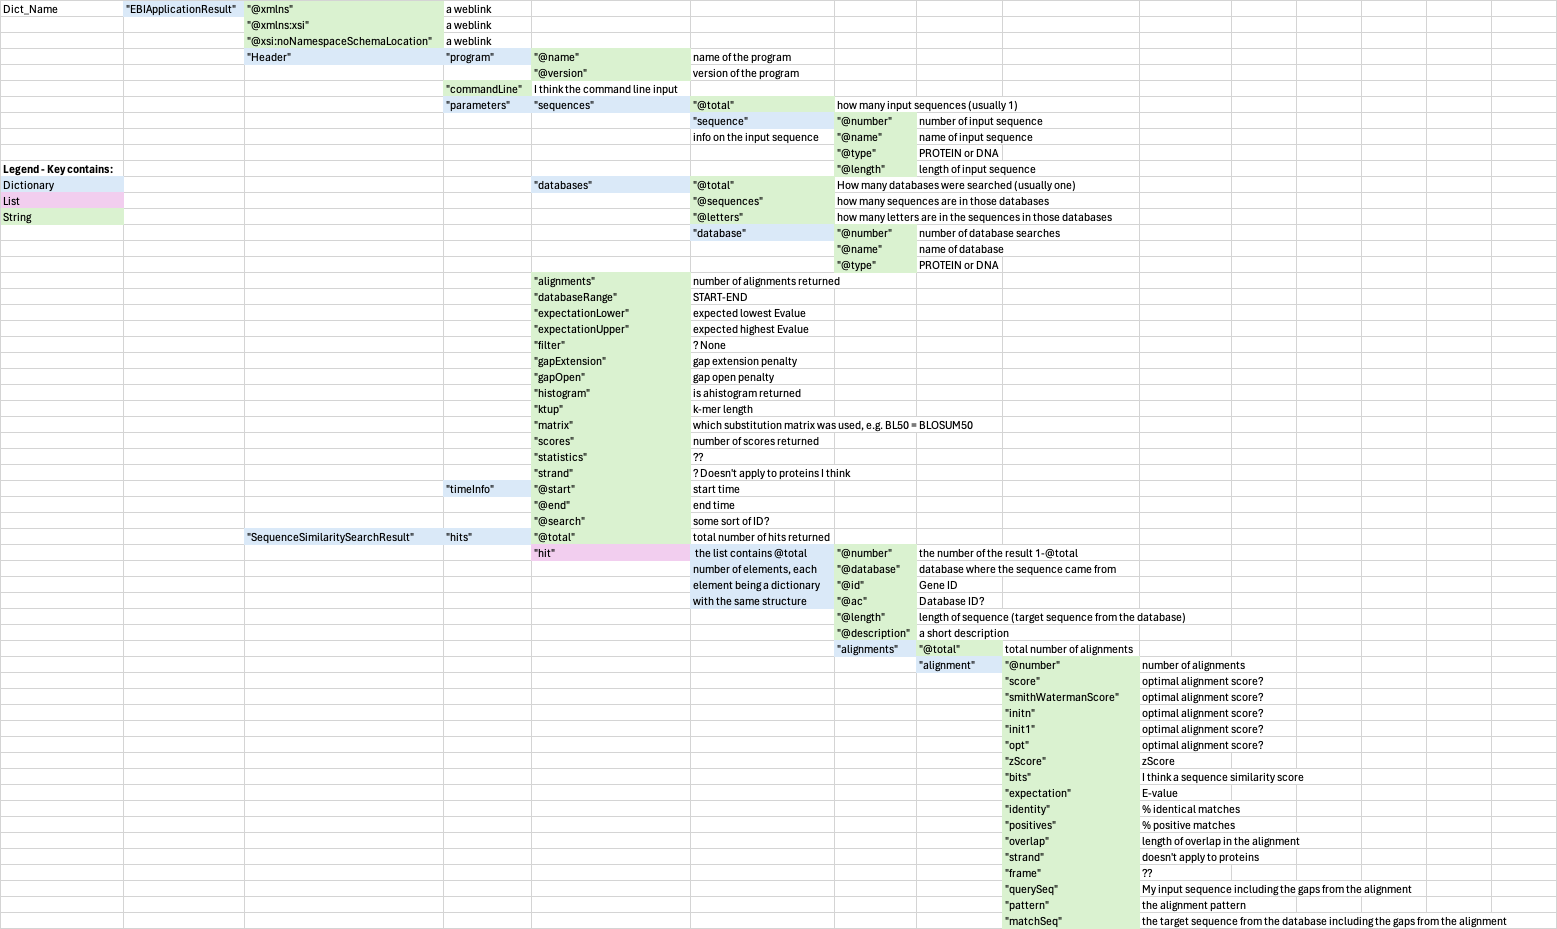

# BLAST

Basic Local Alognment Search Tool

- Idea: Only words that probably didn’t evolve randomly are considered
- The “Matchscore” from a substitution matrix of the word or k-mer is his T-Score
- The T-Score has to be higher than a threshold T to be significant and considered further
  - That means instead of running a search will all k-mers from our query sequence we run the search only with specific k-mers
  - For example a k-mer like AAA would NOT be used by BLAST but by FastA

**Step1: Library Generation**

- library of k-mers with a high enough T-score and kmers similar to these
- T is 11 or 13
- all potential neighbors (similar k-mers with only 1-2 substitutions) are also added

**Step2: Seeding**

- k-mers aer matched exactly to the seqeucnes of the database
- process = seeding, alignment of k-mer and query sequence = seed
- seed is elongated in both directions looking for positive scores with the substitution matrix
- if the extended seed is big enough it is a Maximal Segment Pair (MSP) and taken to the next step

**Step3: Chaining**

- combining multiple MSAs to create High Scoring Pairs (HSPs)
- done using a banded Alignment algorithm to create an approximate alignment
- only high enough HSPs are returned

## Blast Webservices

https://blast.ncbi.nlm.nih.gov/Blast.cgi

- different version:
  - protein
  - nucleotide
  - protein -> nucleotide (translational)
  - nuceotide -> protein (translational)
- possible to upload files with several sequences, an individual search is done for each sequence
- database
  - default: non-redundant protein sequences (NCBI)
  - better to switch to SwissProt!

General parameters

- Max target sequence = how many outputs
- Word size = k-mer size
- Matrix and gap costs as before

**Saving the data**

Two ways of downloading the sequences of the hits:

- only the part of the sequences that is aligned with the query, cutting off everything else
- the complete sequence
- the xml file contains the *aligned* part of the sequences only.
- see exercise 3 in how to read in the xml and access the information with the example of a BLASTp in pdb

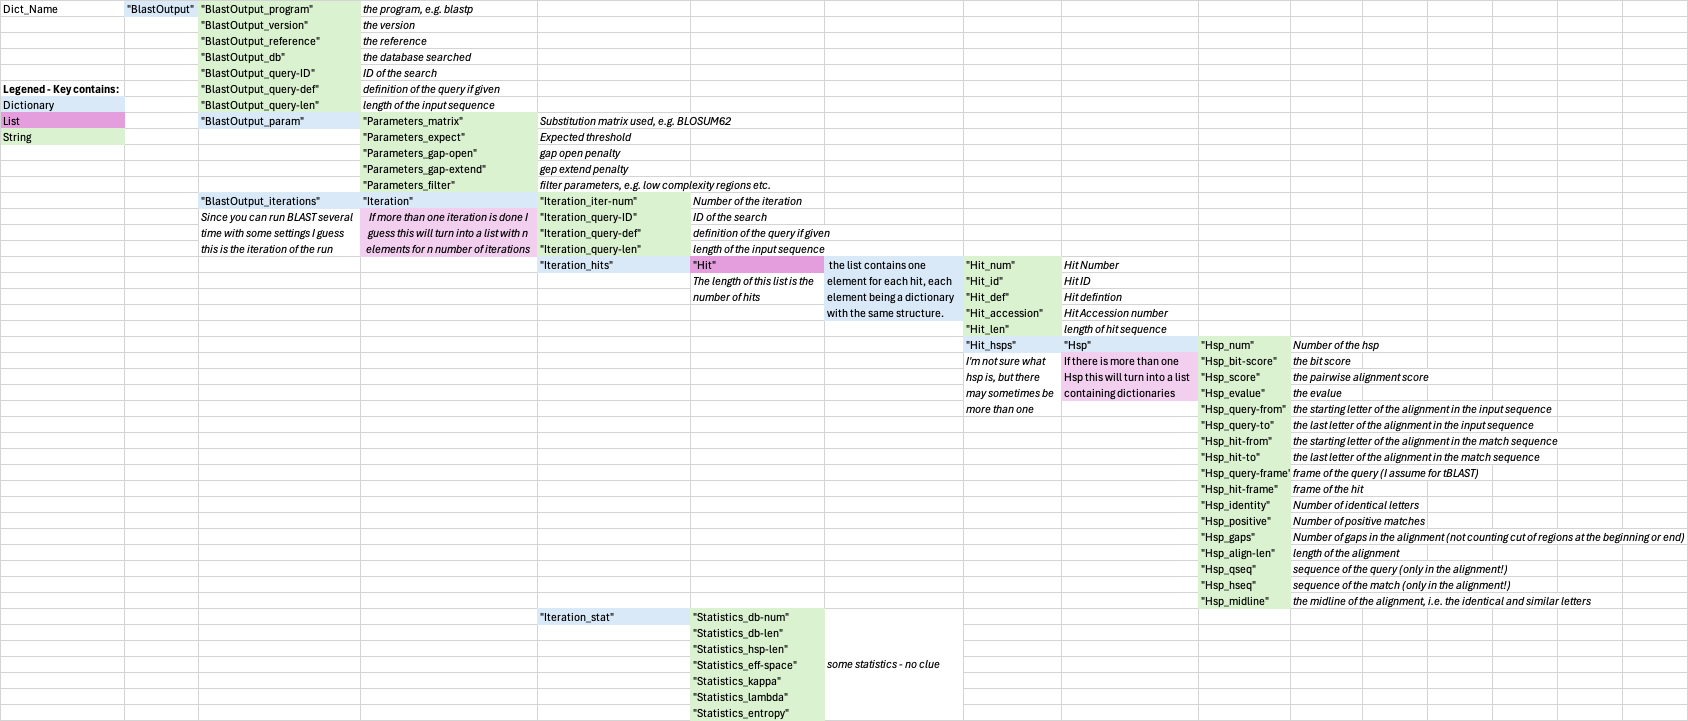

## BLAST variants 

the original BLAST was for proteins, the variants are for nucleotides or translated nucleotides to search for proteins

- BLASTn: normal nucleotides
- BLASTx: translational
- tBLASTn: translational
- tBLASTx: translational

nucleotide BLAST takes 10-20x longer than protein blast!! translational BLAST even longer!! Can lead to CPU linit errors

### BLASTn

similar to protein BLAST with adjustments:

- k-mers of at least 16, default 28
- no scoring matrix but fixed match (1) and mismatch (-2) scores
- linear gap costs of 0 for megabalst and -5 for other blastn versinos instead of affine gap costs
- protein BLAST is more sensitive than a nucleotide BLAST and also quicker, so BLASTn is actually the *only* BLAST that compares nucleotides directly

### BLASTx

first translational method:

- query is a nucleotide sequence
- we search in protein databases!
- the sequence is translated into *6* protein sequences (for the six possible reading frames) and those are blasted
- we get back the best overall result from all six searches

### tBLASTn

- translates the nucleotide database to compare a protein sequence directly to genomic DNA
- protein sequence is compared to 6 databases
- performs protein BLAST

### tBLASTx

- input is nucleotide
- search in nucleotide
- *both* are translated and a protein search is run
- not reccommended for large queries...
- compares 6 reading frames of the input sequence with a database of 6 reading frames

## Low-complexity regions

- represented by large black squares in dotblots
- can cosist of
  - one singel amino acid (AAAAAAA)
  - a certain pattern (CGCGCGCGCG)
  - overabundance of a certain aa (SSGSSCSSGSSC)
- difficult for BLAST -> possible to mask them, i.e. filer them out
- in the settings under Filters and Masking
- which sequences were filtered can be seen in the optimal Alignments (sequence that is written in lower case)
- for BLASTn this is activated by default for BLASTp we have to activate it separately



## Dissimilar sequences 

Normal BLAST requires at least 30% identities with the sequences in the databases. To improve the quality of results with proteins of very low similarity three otehr BLAST versions were created.

### PSI BLAST

Position-Specific Iterative Blast

- derives a position specific scoring matrix (PSSM) from multiple seqeunce alignment got from normal protein-protein blast
- PSSM is used to search the database again for new/more matches
- PSSM is updated in every run to get more results
- usually 2-5 iteratinos are run
- possible to upload an existing PSSM!
- after the first run, the second is started manually on the result page

Calculating a PSSM:

- Are often derived from a set of aligned sequences that are thought to be functionally related
- Has one row for each symbol of the alphabet (4 rows for nucleotides or 20 rows for amino acids) and one column for each position in the pattern / Alignment
- First a basic position frequency matrix (PFM) is created by counting the occurrences of each letter at each position
- From the PFM, a position probability matrix (PPM) can now be created by dividing that former letter count at each position by the number of sequences, thereby normalizing the values
- elements in PSSMs are calculated as log likelihoods
- That means the elements of a PPM (M(k,j)) are transformed using a background model b:
  - `M(k, j) = log2(M(k, j) /bk)`
  - Describes how an element in the PSSM (left) can be calculated by using the values of the PPM (right)
  - The simplest background model assumes that each letter appears equally frequently in the dataset

See example in pptx


### PHI BLAST

Pattern-Hit Initiated BLAST

- takes both a protein sequence and a pattern of interest that is part of the sequence as input
- searches the database for other instances of this pattern
- uses those as seeds for the local alignment
- often able to detect sigificant similarity between homologous proteins that are missed in a traditional single-pass search
- patterns can be found, e.g. from prosite https://prosite.expasy.org
  - tabular overview of all found domains/motifs
  - usually only available for conserved sites or domains
  - it needs a prosite entry (starts with `PS`)
  - go onto this entry and follow the link to the actual prosite website
  - if you are lucky you will there find the pattern
  - no guarantee to find anything...
- when you enter a pattern into PHI BLAST that doesn't exist in the input sequence -> error message

makeup of the pattern:

- normal letter: that letter exactly
- []: any within
- x: any aa
- (x,y): min x max y aa
- {}: everything EXCEPT whats in there

Example:

```
AA[DEQN]x(2,5){YFWH}
```

two alanines, followed by either Asp, Asn, Glu or Gln, followed by 2-5 random aa, followed by any aa except YFWH

### Delta BLAST

Domain Enhanced Lookup Time Accerlerated BLAST

- multiple step approach to get better resuöts
- RPS BLAST to search through conserved domain database (CDD) ti find domain similar to search query
- since CDD domains contain multiple sequence alignments (MSAs) we can't use normal blast
- after similar domains are identified a PSSM is calculated for the search query using MSAs
- this PSSM is used similar to PSI BLAST 

# Exercises

## Exercise 1 - FastA

- You have different fasta files containing one sequence each
- For at least two sequences run FastA searches using the parameters shown in the table on the right
- Are their any differences between the Search Runs?

|Run |Parameters |Results|
|--|--|--|
|Run 1| Default (BLOSUM50) |50|
|Run 2| BLOSUM62 |50|
|Run 3| BLOSUM80 |50|
|Run 4| PAM250 |50|
|Run 5| PAM120 |50|
|Run 6 |MDM20 |50|
|Run 7| VTML80 |50|
|Run 8| BLOSUM50 but no gap penalties |50|
|Run 9| BLOSUM50 but highest gap penalties |50|
|Run 10| Default |250|
|Run 11| Default |100|

see also the jupyter notebook file where I read in the xml and do some very basic analysis

**Run1 P41221 - BLOSUM50**
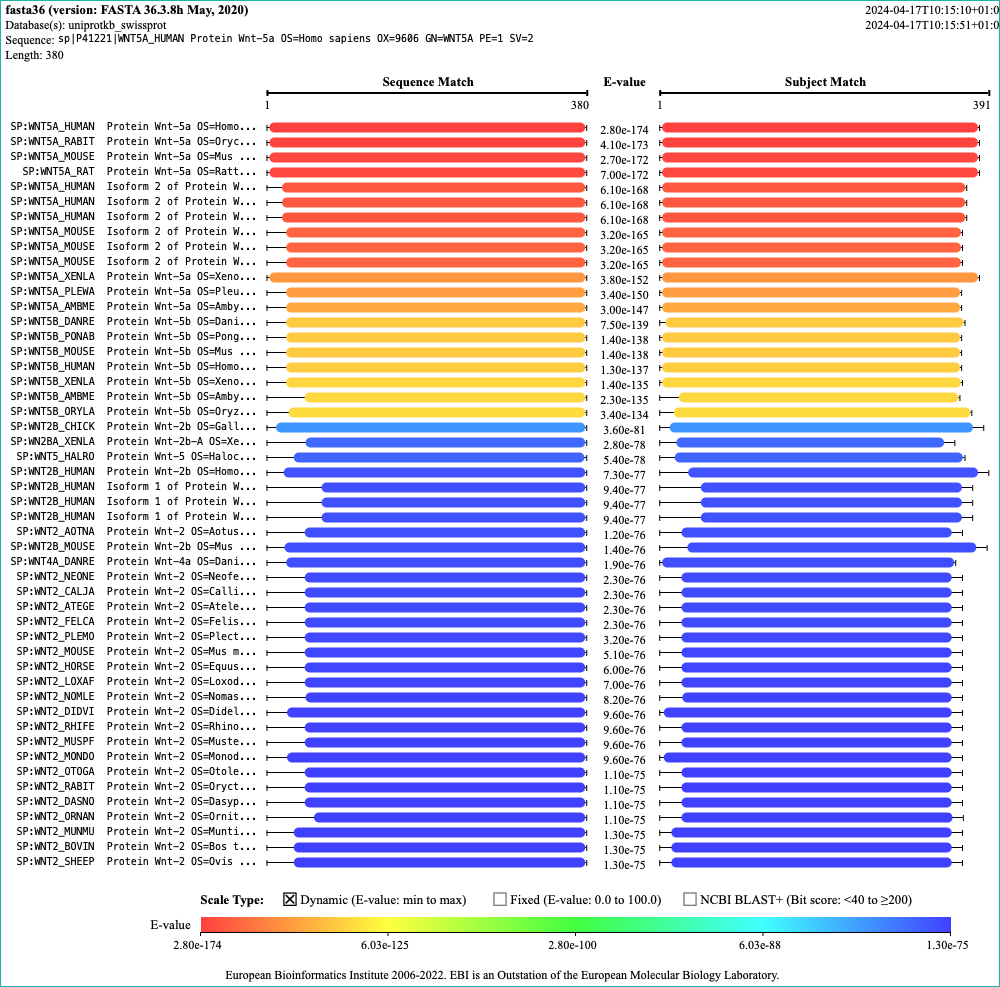

**Run2 P41221 - BLOSUM62**
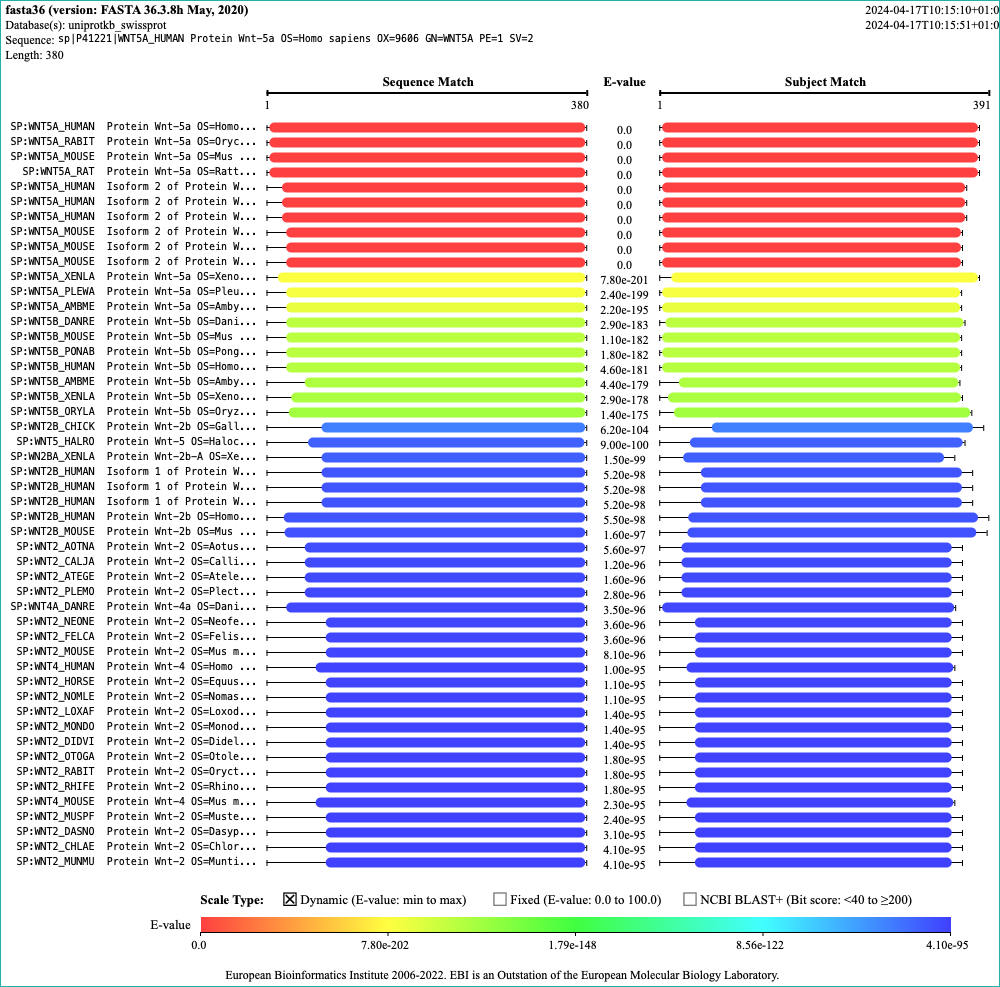

**Run8 P41221 - BLOSUM50 no gap penalties**
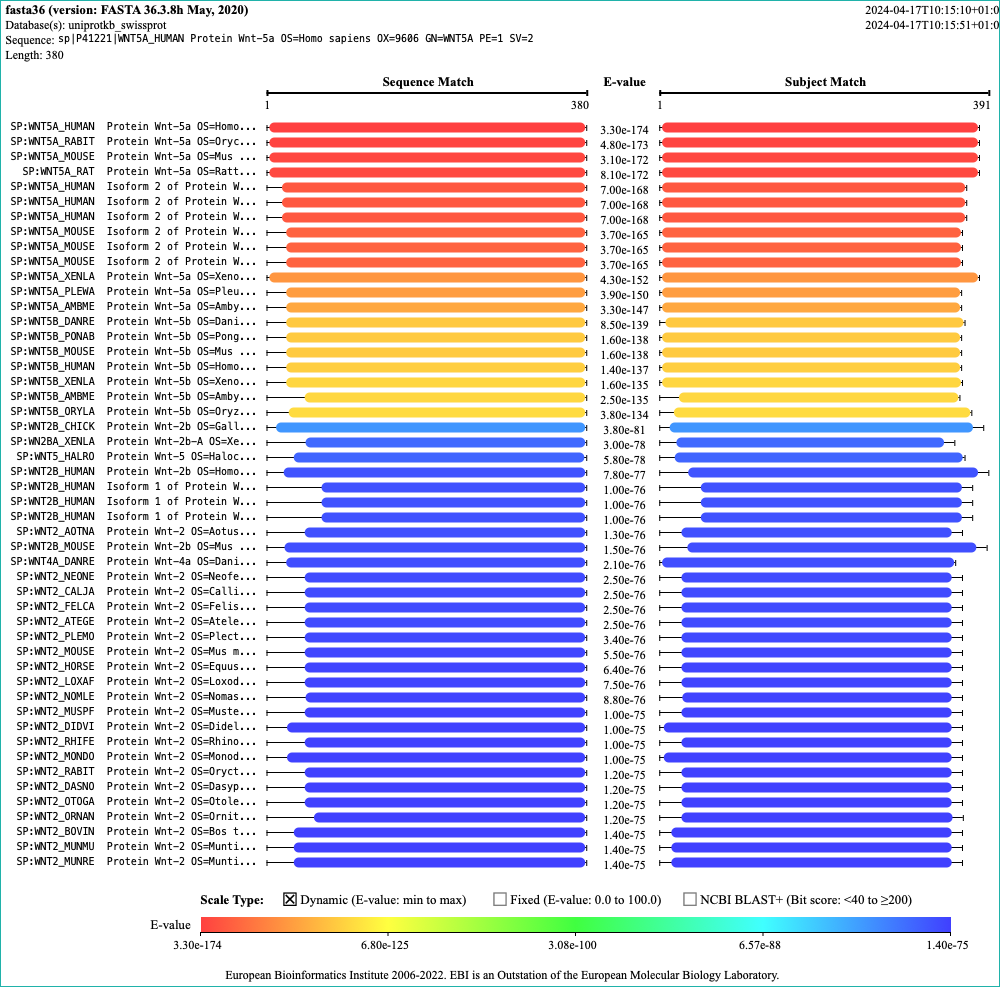

**Run9 P41221 - BLOSUM50 max gap penalties**
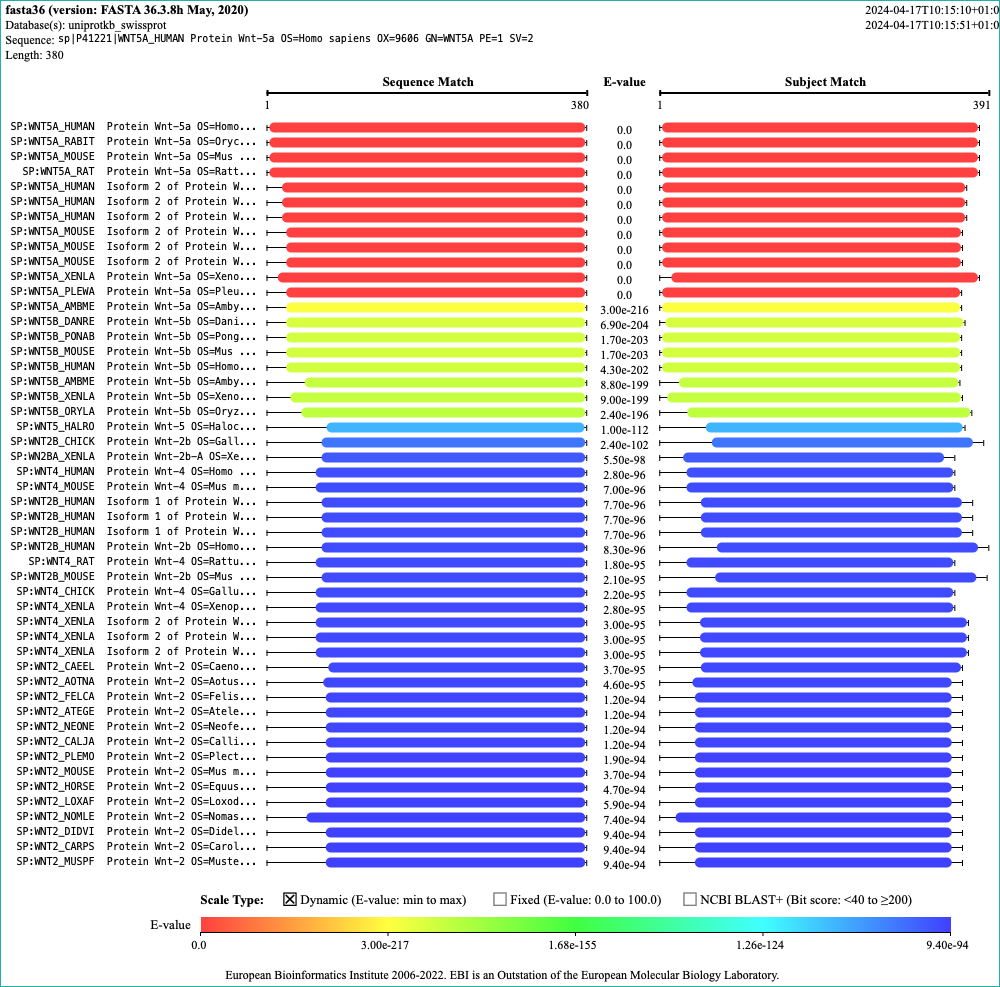

## Exercise 2 - WNT-Proteins

Run a BLAST Search with the fasta-file P41221.fasta against the SwissProt and the RefSeq
Protein. Please include only results from the organism homo sapiens. How many results can
you get from these two searches. Can you find the sequence with the UniProt identifier
P56704 in the results for the search against the SwissProt? 

UniProt: 19 Sequences, RefSeq 2 sequences
P56704 is Wnt3a, 9th from the top in swissprot

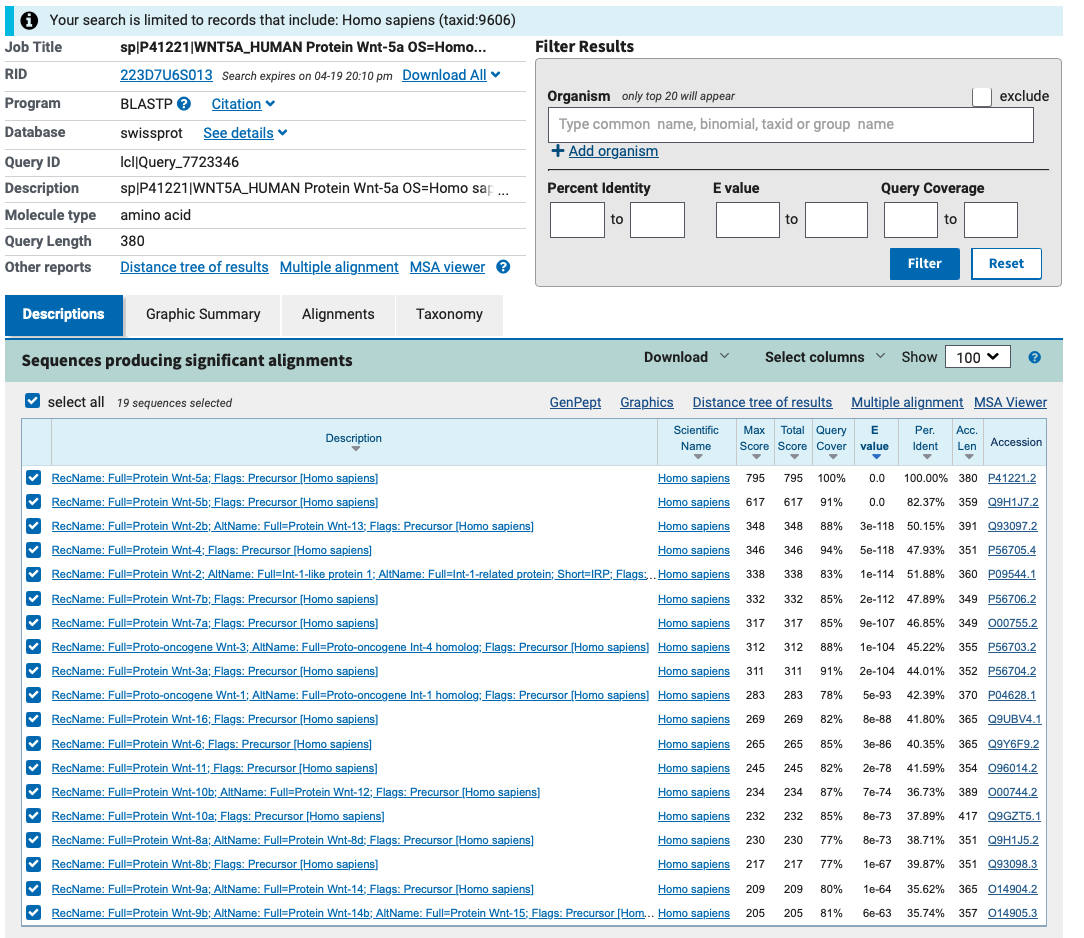

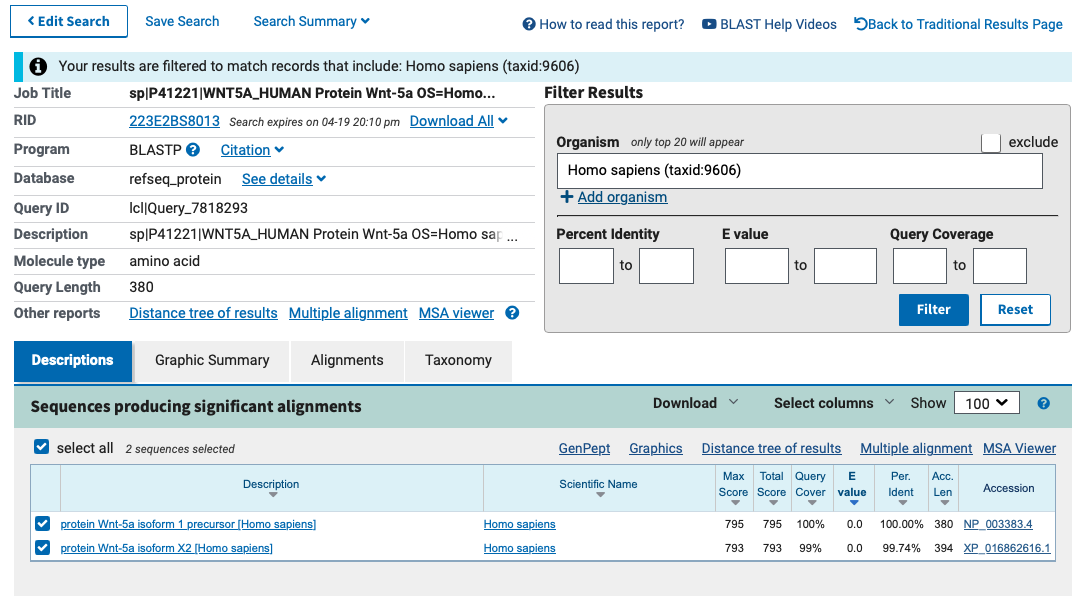

Afterwards download all results in a single fasta-file and create at least two multiple sequence alignments using Clustal Omega, MUSCLE, MAFFT, T-COFFEE or K-Align of the two result sets. What would you say about the quality of the MSAs?

Clustal Omega: the two RefSeq align perfectly (except for a short part in the beginning), the 19 swissprot proteins align fine with some big gaps that only exist in a few sequences

KALIGN: same as ClustalOmega...

## Exercise 3 - Structure Search

Use the fasta-files OIP98664.fasta, WP_223908953.fasta and NP_477249.fasta to run protein
BLASTS against the pdb database with default settings. How many results does each of the
three searches produce. Repeat the searches but this time use a wordsize of 2. Are there any
differences in the results? You probably realized that for NP_477249.fasta you only get results
that align to the end of the sequence. Try to find sequences in the pdb for the query ranges 1-
250, 1-300 and 1-350 to see whether you can find structures for this part. How do the results
of these searches look like? Last but not least go to the UniProt and search for the sequence
using the identifier of it (the name of the file). What kind of structures can you find there?

|           |OIP98664|WP_223908953|NP_477249|
|-----------|--------|------------|---------|
|**Default**|78      |53          |100      |
|**word size 2**| 93 |95          |100       |
|**range 1-250**|/|/|0|
|**range 1-300**|/|/|0|
|**range 1-350**|/|/|100|



## Exercise 4 – Protein BLAST

Run BLAST searches using the same sequences as in Exercise 1. Start multiple Runs using the different search parameters shown in the table below.

|Run |Parameters |Alignments|
|-|-|-|
|Run 1| Default| 100|
|Run 2| BLOSUM50| 100|
|Run 3| BLOSUM90| 100|
|Run 4| PAM250| 100|
|Run 5| PAM30| 100|
|Run 6| PAM70| 100|
|Run 7| BLOSUM62 and word size 2 |100|
|Run 8| BLOSUM62 and minimal gap penalties |100|
|Run 9| Default| 250|
|Run 10| Default |1000|

## Exercise 5 - Hepatitis C NS5B

Use the accession codes KR855587.1 and KR855596.1 to run normal nucleotide BLASTs against
the “Nucleotide Collection” database while showing the best 500 Hits. Afterwards use blastx
with the same sequences against the “non-redundant protein sequences” database, against
the “UniProtKb/Swiss-Prot” database and against the “Protein Data Bank proteins” database.
Are there any big differences between the results for the two sequences?
Create pairwise Alignments using Needleman-Wunsch and Smith-Waterman to see how
closely these two sequences are related to each other.

## Exercise 6 - Jurassic Park

Michael Crichton's fantasy about cloning dinosaurs, Jurassic Park, contains a putative dinosaur
DNA sequence. Use nucleotide-nucleotide BLAST against the default nucleotide database, nr,
to identify the real source of the following sequence. Select, copy and paste it into the BLAST
form window

NCBI scientist Mark Boguski noticed this obvious "contaminant" and supplied Crichton with a
better sequence, shown below, for the sequel, The Lost World. Identify the most likely source
of this sequence using nucleotide-nucleotide BLAST. Mark imbedded his name in the sequence
he provided. To see Mark's name use the translating BLAST (blastx) page with the sequence
below. (Look for MARK WAS HERE NIH).

> Looks like a bacterial contamination

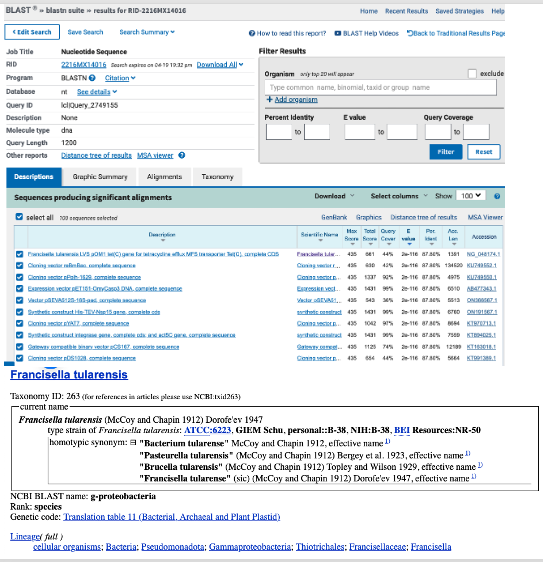


> The second comes from a chicken

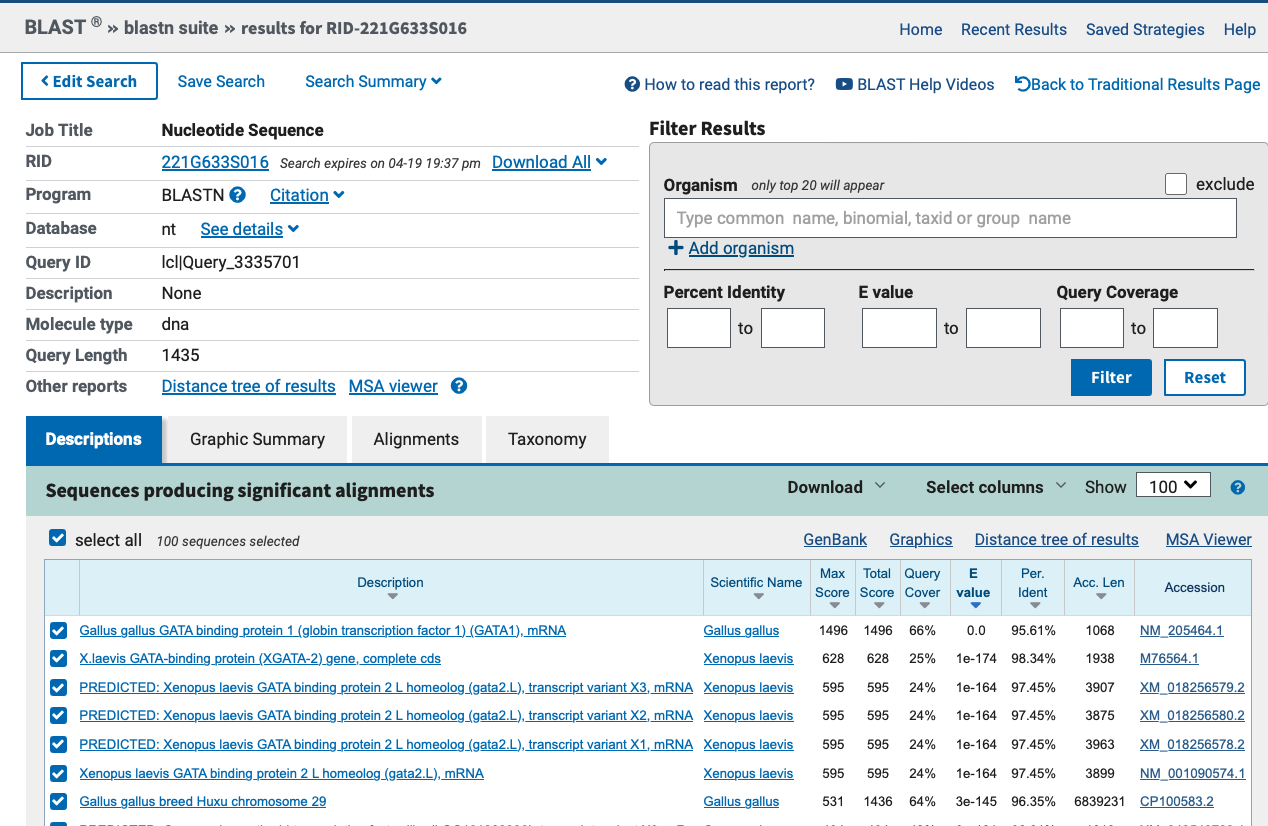

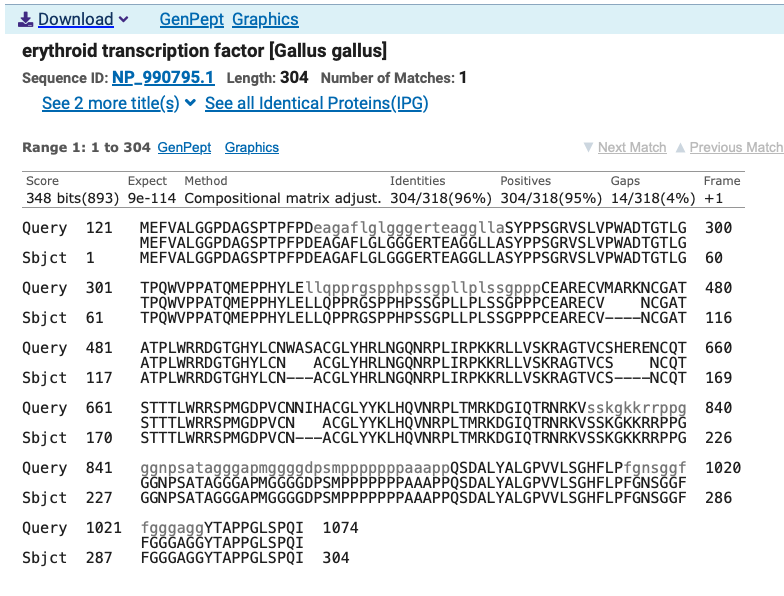

## Exercise 7 - Blast Alternatives

You have ten fasta files containing Nucleotide sequences. Use at least two of them to run the
searches shown in the table below. Only change the listed parameter and leave the rest on
default.

|Run| Program |Parameters |Alignments|
|--|--|--|--|
|Run 1| blastn| Default| 100|
|Run 2 |blastx| Default |100|
|Run 3| blastn| word size 16| 100|
|Run 4| blastn| word size 128 |100|
|Run 5| blastn| Match/Mismatch Score 1,-4 |100|
|Run 6| blastn| Match/Mismatch Score 5,-4 |100|
|Run 7| blastx| word size 2| 100|
|Run 8| blastx |BLOSUM45 |100|
|Run 9| blastx |PAM250| 100|
|Run 10| blastx |PAM30 |100|

Use at least two protein sequences to run the searches shown below with tblastn.

|Run |Program |Parameters| Alignments|
|--|--|--|--|
|Run 1| tblastn| Default |100|
|Run 2| tblastn| word size 2| 100|
|Run 3| tblastn| BLOSUM45 |100|
|Run 4| tblastn |PAM250 |100|
|Run 5| tblastn| PAM30| 100|

## Exercise 8 - Yeast SCP160 Protein

Download the fasta file for the UniProt entry with the ID P06105. Run a normal Protein BLAST
with this sequence against the swissprot and look at the results. How many of these results
do you think you could use later on? Use the sequence to run a scan on the InterPro as well
to find some interesting patterns you could use for a PHI-BLAST. Are there any useable
patterns? Now run a PHI-BLAST by using the pattern shown below. How do the results differ
from the normal protein BLAST run? In theory your protein should have 7 to 14 repeats of the
pattern shown below, can you find at least seven of them? (Tip: Make use of the InterPro
results, this pattern is part of the KH domains)
```
[ILV]-X-[ILV]-X(7,8)-[ILV]-[IV]-G-X(2)-G-X(2)-[ILV]-X(2)-[IL]-X(7,8)-[IV]-X-[ILVF]
```

- only the first entry looks usable and that is the exact match
- everything else has <25% identity

||BLASTp|PHI BLAST|
|-|-|-|
|**results**|16|22|


still mainly the same numbers for score etc. but more results